In [63]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [64]:
class AgentState(TypedDict):
    number1:int
    operation: str
    number2:int
    finalNumber: int
    number3:int
    operation2: str
    number4:int
    finalNumber2: int

In [ ]:
def add1(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

In [ ]:
def sub1(state: AgentState) -> AgentState:
    """This node finds the difference of the two numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

In [67]:
def add2(state:AgentState)-> AgentState:
    """This node adds the 2 numbers"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state


In [68]:
def sub2(state:AgentState) -> AgentState:
    """This node finds the difference of the two numbers"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

In [69]:
def first_router(state:AgentState) -> str:
    """This node routes based on the operation"""
    if state["operation"] == "+":
            return "addition_operation_1"
    elif state["operation"] == "-":
            return "subtraction_operation_1"

In [70]:
def second_router(state:AgentState) -> str:
    """This node routes based on the operation"""
    if state["operation2"] == "+":
            return "addition_operation_2"
    elif state["operation2"] == "-":
            return "subtraction_operation_2"

In [71]:
graph = StateGraph(AgentState)
graph.add_node("add_node_1", add1)
graph.add_node("subtract_node_1", sub1)
graph.add_node("add_node_2", add2)
graph.add_node("subtract_node_2", sub2)
graph.add_edge(START, "firstRouter")
graph.add_edge("add_node_1", "secondRouter")
graph.add_edge("subtract_node_1", "secondRouter")
graph.add_node("firstRouter", lambda state:state)
graph.add_node("secondRouter", lambda state:state)

graph.add_conditional_edges(
    "firstRouter",
    first_router, 
    {
        "addition_operation_1": "add_node_1",
        "subtraction_operation_1": "subtract_node_1"
       
    })
graph.add_conditional_edges(
    "secondRouter",
    second_router, 
    {
        # Edge: Node
        "addition_operation_2": "add_node_2",
        "subtraction_operation_2": "subtract_node_2",
   }
)
graph.add_edge("add_node_2",END)
graph.add_edge("subtract_node_2",END)

In [72]:
app = graph.compile()

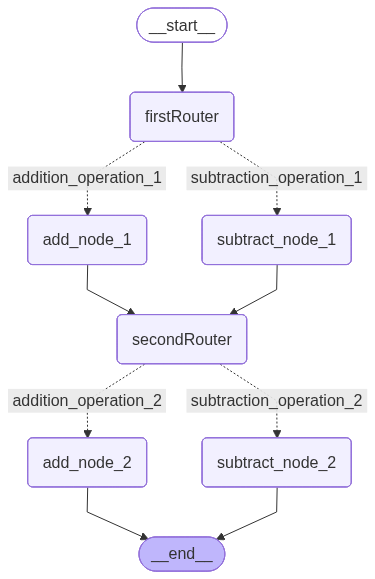

In [73]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [74]:
result = app.invoke({
    "number1": 10,
    "operation": "-",
    "number2": 5,
    "number3": 7,
    "number4": 2,
    "operation2": "+",
    "finalNumber": 0,
    "finalNumber2": 0
})

InvalidUpdateError: Expected dict, got secondRouter
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_GRAPH_NODE_RETURN_VALUE